In [1]:
import sys
import scipy.sparse as sparse
import scipy.sparse.linalg
from numpy import linalg as LA
import numpy as np
import math
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
#from simanneal import Annealer
import networkx as nx
from random import randrange
import itertools
import random
from scipy.optimize import minimize
#from pulp import *

# Defining graphs:

We use several graphs. The class graphs should contain definitions of relevant graphs in create_graphs following the option kind. The parameter nsize should contain relevant information for the size of the lattice. 

In [2]:
bethe = 0
rrg = 1
tri = 2

class graphs:
    # nsize is a list that contains the information about the size of the lattice:
    # For a Bethe lattice, nsize = [branching factor, number of generations]
    # For random-regular graph, we give nsize = [degree of each node,number of nodes]. 
    # WARNING: nsize[0]*nsize[1] should be even for random-regular graphs, see documentation in:
    # https://testfixsphinx.readthedocs.io/en/latest/reference/generated/networkx.generators.random_graphs.random_regular_graph.html#networkx.generators.random_graphs.random_regular_graph
    # For triangular lattice, it Returns the nsize[0] by nsize[1] triangular lattice graph
    def __init__(self, nsize, kind = bethe):
        self.kind = kind
        self.nsize = nsize
    
    # First, we create the graph: in the nsize variable we give the parameter that controls the size of the graph
    def create_graph(self, pinta = False ):
        if self.kind == bethe:
            G = nx.balanced_tree(nsize[0], nsize[1])
        if self.kind == rrg:
            G = nx.random_regular_graph(nsize[0], nsize[1])
        if self.kind == tri:
            G = nx.triangular_lattice_graph(nsize[0], nsize[1])
        if pinta:
            nx.draw(G)
            print("Is it coplanar?")
            print(nx.check_planarity(G))
        return G
    # This subroutine gives the adjacency matrix or matrix of conecctions. 
    # It creates its own instance of lattice following the prescription
    # in kind. The option dense = True, then retudn the matrix of conections in dense matrix form. 
    # If dense = False, it gives the matrix of conections in sparse form. If opt = de, it gives two arrays
    # with the coorinates of non-zero elements
    def give_ad(self, opt = 'de'):
        G = self.create_graph()
        J = nx.adjacency_matrix(G)
        if opt == 'de':
            A = J.todense()
        elif opt == 'sp':
            A = J
        elif opt == 'nz':
            A = J.nonzero()            
        return A


Is it coplanar?
(True, <networkx.algorithms.planarity.PlanarEmbedding object at 0x7feb2262d908>)
[[0 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]]


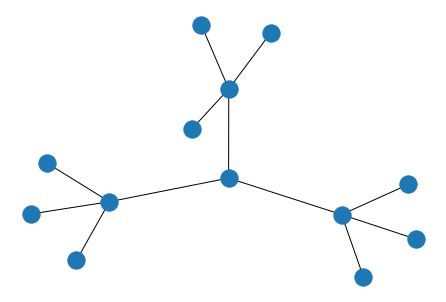

In [6]:
# Create a Bethe lattice with branching number 2 and number of generations 4. Branching number 
# is the number of edges of the root of the lattice. Each node that is not the root has a number of conections 
# equals to the branching number plus 1. Brunching number is the number of childs, (2 normal >7 Opus Dei)
nsize = [3,2]
A = graphs(nsize, kind = bethe)
G = A.create_graph(pinta = True)
J = A.give_ad(opt = 'de')
print(J)

In [8]:
nx.adjacency_matrix()

TypeError: adjacency_matrix() missing 1 required positional argument: 'G'